In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

import datetime

In [3]:
df=pd.read_csv('day.csv')

In [4]:
df.shape

(730, 16)

Feature selection through RFE and then features manually selected if required to remove variables that are highly collinear and also improve the adj R2 score

In [5]:
df.info()
#There does not seem to be any missing values in the dataset and the respective datatypes are also correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Here the column "weekday" seems incorrect. For example 01-01-2018 corresponds to first day of the week, however for the same date in the weekday column it has a value of "6". It is better to drop this column and extract the weekday as a seperate column from "dteday"


In [8]:
df['dteday']= pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df['weekday_new'] = df['dteday'].dt.dayofweek
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
df=df.drop('weekday',axis=1)
#existing column of "weekday" is dropped from dataset

In [11]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [13]:
df.season=df.season.map(season_mapping)

In [14]:
weathersit_mapping={1:"clear_partlycloudy",2:'Mist + Cloudy',3:'Light Snow+Thunderstorm',4:'Heavy Rain + Ice Pallets'}

In [15]:
df.weathersit=df.weathersit.map(weathersit_mapping)

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2018-01-01,Spring,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,Spring,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,Spring,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,Spring,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,Spring,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      730 non-null    int64         
 1   dteday       730 non-null    datetime64[ns]
 2   season       730 non-null    object        
 3   yr           730 non-null    int64         
 4   mnth         730 non-null    int64         
 5   holiday      730 non-null    int64         
 6   workingday   730 non-null    int64         
 7   weathersit   730 non-null    object        
 8   temp         730 non-null    float64       
 9   atemp        730 non-null    float64       
 10  hum          730 non-null    float64       
 11  windspeed    730 non-null    float64       
 12  casual       730 non-null    int64         
 13  registered   730 non-null    int64         
 14  cnt          730 non-null    int64         
 15  weekday_new  730 non-null    int64         
dtypes: datet

In [18]:
df_1=df.drop('instant',axis=1)
df_1
#the index column is dropped

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,2018-01-01,Spring,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,Spring,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2018-01-03,Spring,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2018-01-04,Spring,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2018-01-05,Spring,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,Spring,1,12,0,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114,4
726,2019-12-28,Spring,1,12,0,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095,5
727,2019-12-29,Spring,1,12,0,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341,6
728,2019-12-30,Spring,1,12,0,0,clear_partlycloudy,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0


In [19]:
df_1.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,0.000684
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,0.006080
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,-0.048541
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542,0.464121
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.029929
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.023235
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.034223
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.011361
casual,2.505017e-01,1.212079e-01,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,-0.120906
registered,5.969106e-01,2.919516e-01,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.148473


There is a positive correlation between the target variable "cnt" with 'temp', 'atemp','casual' and 'registered, based on the above shown correlation values. The target variable "cnt" is a sum of "registered" and "casual" and hence we observe high collinearity among them. Target variable "cnt" has a negative correlation with "windspeed". Data visualization can be helpful for better understanding

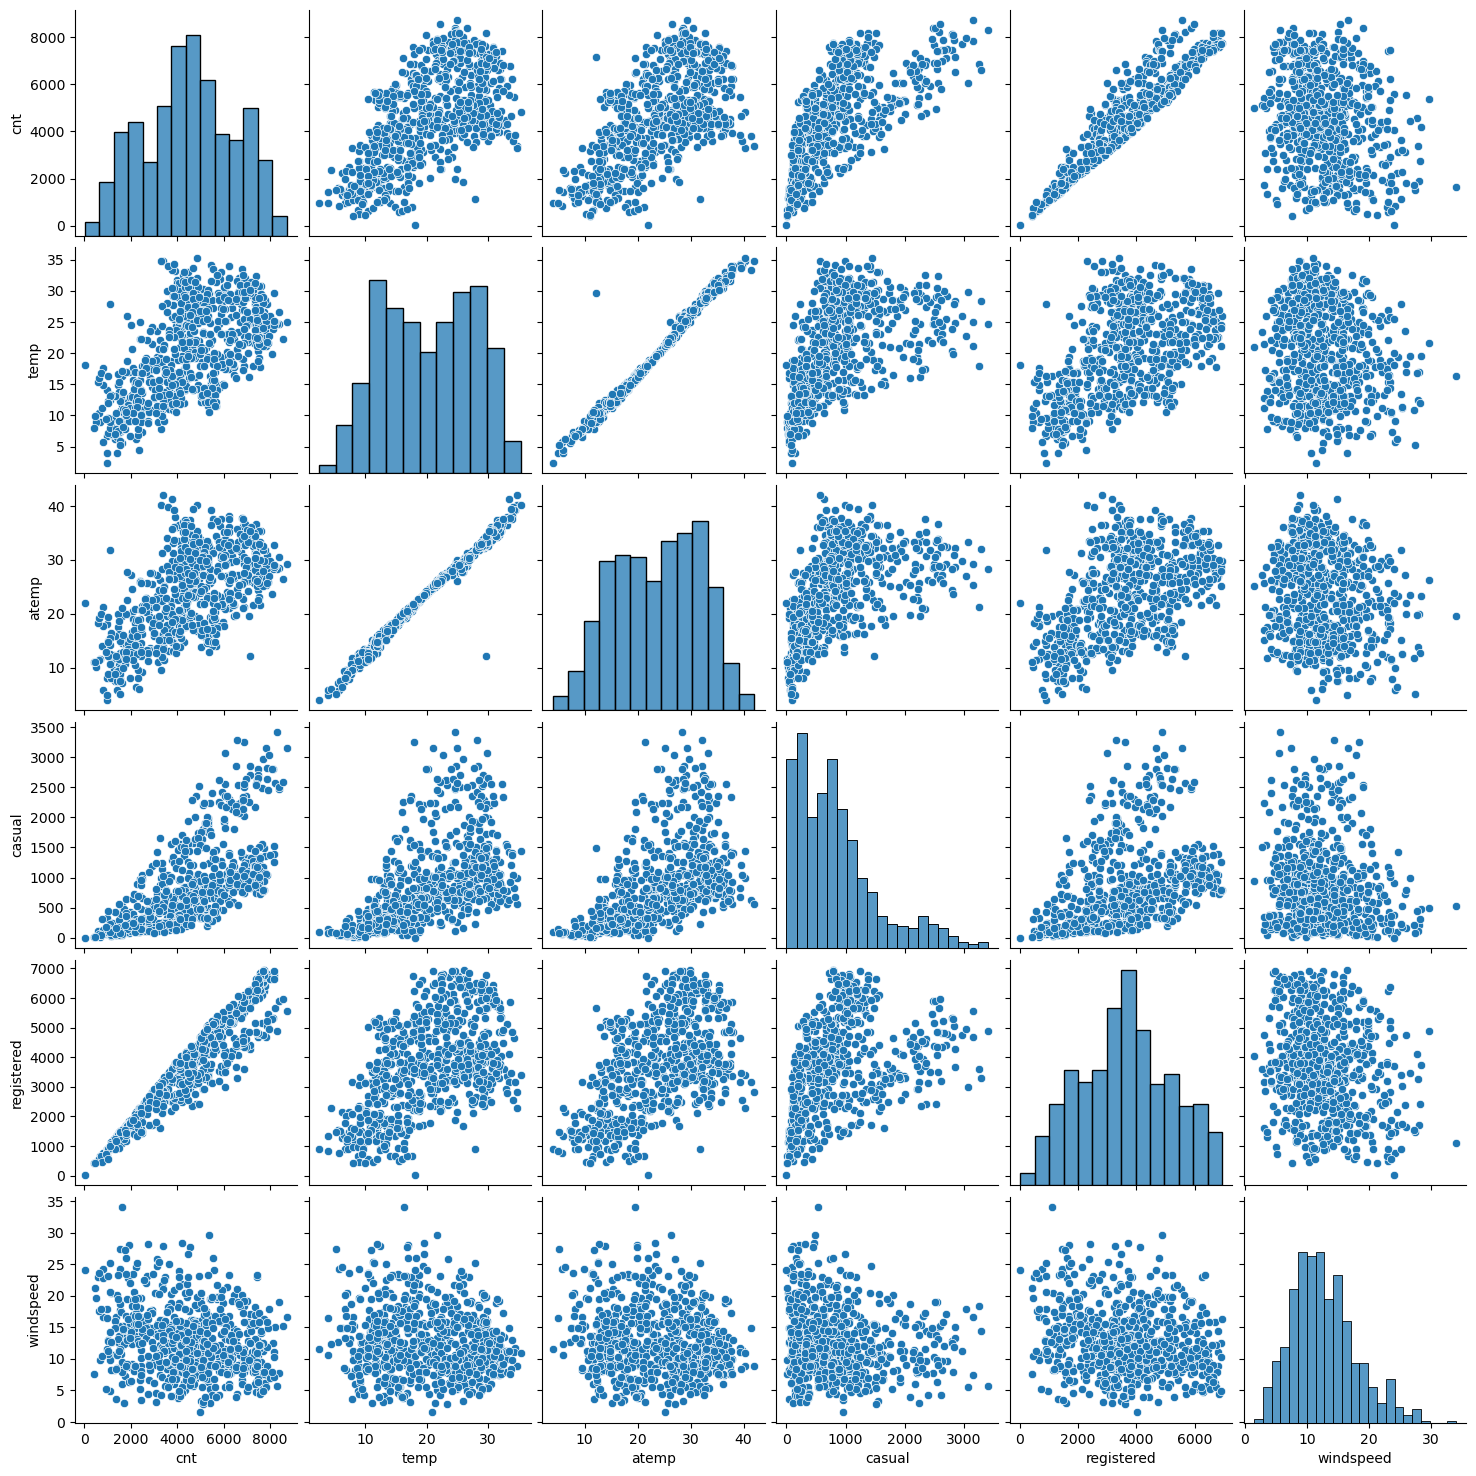

In [20]:
sns.pairplot(df_1[['cnt','temp','atemp','casual','registered','windspeed']])
plt.show()

In [21]:
df_1=df_1.drop(['casual','registered','dteday'],axis=1)
# target variable 'cnt'is a sum of casual and registered users, hence it makes sense to remove these variables

In [22]:
df_1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'weekday_new'],
      dtype='object')

Visualizations of the target variable with other categorical variables

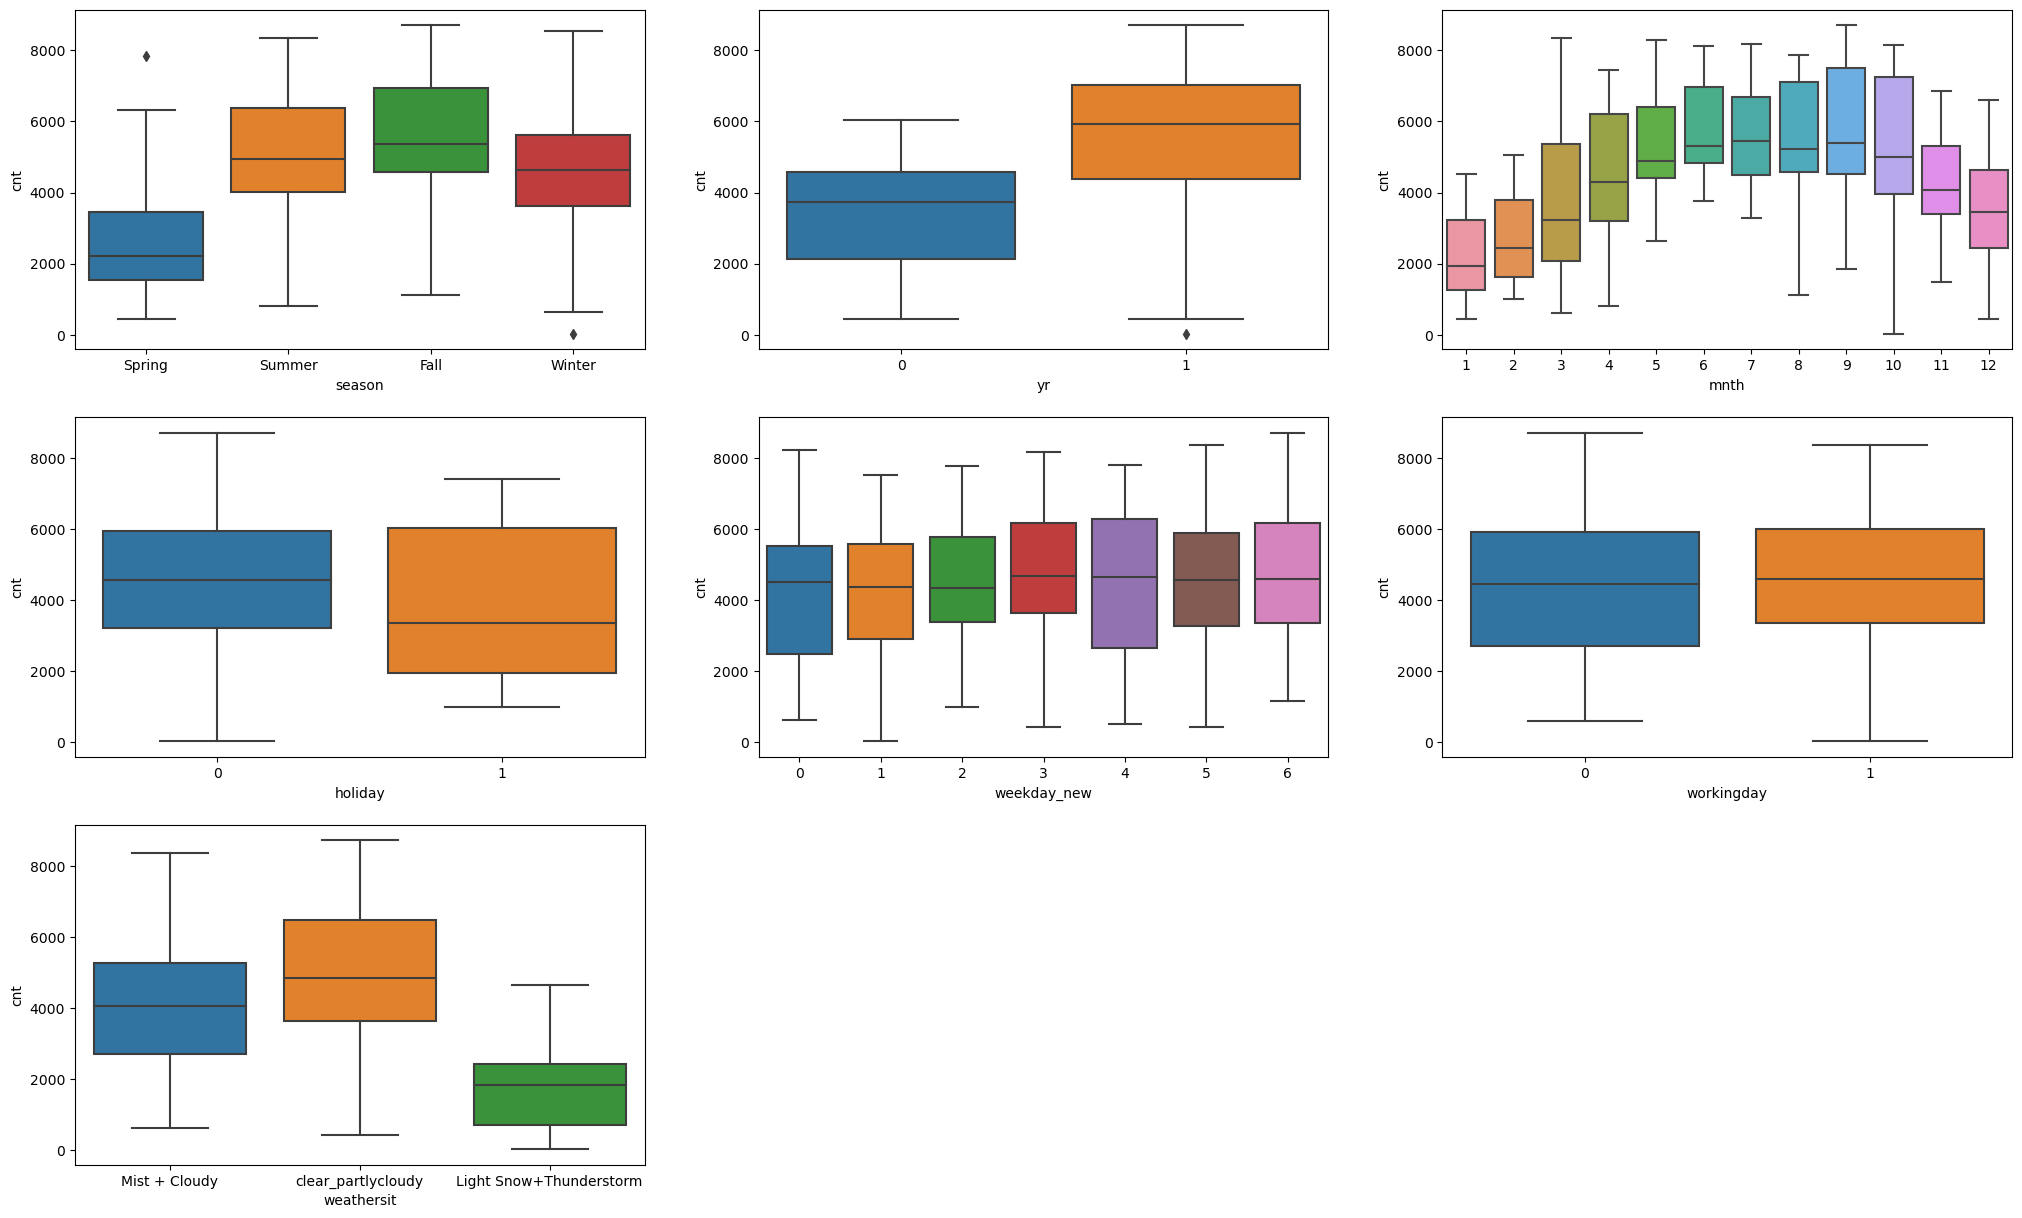

In [23]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df_1)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df_1)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df_1)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df_1)
plt.subplot(3,3,5)
sns.boxplot(x='weekday_new',y='cnt',data=df_1)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df_1)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df_1)
plt.show()

1) Higher median values for summer and fall seasons indicate higher number of users during these seasons
2) There is a significant increase in the no.of users for the year 2019
3) There is a gradual increase in the no.of users from the months january to july and then it starts decreasing
4) Higher no.of users are present on a holiday/weekend. It is assumed that "0" indicates holiday/weekend
5) Working day or a weekday do not have any significant impact on the no.of users as there is not much change in the median values
6) More no.of users (5000 approx.) are observed if the weather is "clear or partly cloudy", compared to when it is misty and cloudy (4000 apprx users)

Also there are no outliers in these plots.
By converting the features "season" and "weathersit" into dummy variables, their effect can be captured in the linear regression model

In [24]:
seasons=pd.get_dummies(df_1['season'],drop_first=True)
seasons

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [25]:
df_2=pd.concat([df_1,seasons],axis=1)

In [26]:
df_2.drop('season',axis=1,inplace=True)

In [27]:
df_2.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter
0,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0
3,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0
4,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0


In [28]:
weathersit_dummy=pd.get_dummies(df_2['weathersit'],drop_first=True)
weathersit_dummy

,Mist + Cloudy,clear_partlycloudy
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
725,1,0
726,1,0
727,1,0
728,0,1


In [29]:
df_2=pd.concat([df_2,weathersit_dummy],axis=1)

In [30]:
df_2.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
0,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0
1,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0
2,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,1
3,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,1
4,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,1


In [31]:
df_2.drop('weathersit',axis=1,inplace=True)

In [32]:
df_2.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,1
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,1


In [33]:
#splitting data into train and test datasets
df_train,df_test=train_test_split(df_2,train_size=0.7,test_size=0.3,random_state=100)

In [34]:
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


In [35]:
scaler=MinMaxScaler()

In [36]:
num_vars=['mnth','weekday_new','temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.485294,0.243137,0.245098,0.24902,0.343137,0.627451
std,0.500429,0.315338,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.335050,0.429398,0.430568,0.43287,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.166667,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.833333,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   mnth                510 non-null    float64
 2   holiday             510 non-null    int64  
 3   workingday          510 non-null    int64  
 4   temp                510 non-null    float64
 5   atemp               510 non-null    float64
 6   hum                 510 non-null    float64
 7   windspeed           510 non-null    float64
 8   weekday_new         510 non-null    float64
 9   Spring              510 non-null    uint8  
 10  Summer              510 non-null    uint8  
 11  Winter              510 non-null    uint8  
 12  Mist + Cloudy       510 non-null    uint8  
 13  clear_partlycloudy  510 non-null    uint8  
dtypes: float64(6), int64(3), uint8(5)
memory usage: 42.3 KB


In [39]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_new', False, 3),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mist + Cloudy', True, 1),
 ('clear_partlycloudy', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Mist + Cloudy', 'clear_partlycloudy'],
      dtype='object')

In [42]:
#adding the constant fot "statsmodels" and then fitting the linear model for training dataset
X_train_rfe = X_train[col] 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit() 

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.78e-183
Time:                        09:08:33   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0515      0.049      1.057      0.291      -0.044       0.147
yr                     0.2307      0.008     27.186      0.000       0.214       0.247
holiday               -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp                   0.4961      0.035     14.324      0.000       0.428       0.564
hum                   -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed             -0.1827      0.027     -6.794      0.000      -0.236      -0.130
Spring                -0.0746      0.021     -3.597      0.000      -0.115      -0.034
Summer                 0.0421      0.014      3.024      0.003       0.015       0.070
Winter                 0.0883      0.017      5.194      0.000       0.055       0.122
Mist + Cloudy          0.1872      0.026      7.171      0.000       0.136       0.239
clear_partlycloudy     0.2409      0.028      8.751      0.000       0.187       0.295
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF values for the features present in the training dataset

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.69
2,temp,20.14
9,clear_partlycloudy,14.01
8,Mist + Cloudy,8.65
5,Spring,5.02
4,windspeed,4.60
7,Winter,3.63
6,Summer,2.53
0,yr,2.09
1,holiday,1.04


In [45]:
#from the summary, all the p-values are significant, however the feature "hum" has high VIF value and hence it is removed
X_train_new = X_train_rfe.drop('hum', axis = 1)

In [46]:
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.42e-181
Time:                        09:08:33   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0571      0.038     -1.487      0.138      -0.133       0.018
yr                     0.2340      0.009     27.430      0.000       0.217       0.251
holiday               -0.0877      0.027     -3.254      0.001      -0.141      -0.035
temp                   0.4667      0.034     13.720      0.000       0.400       0.533
windspeed             -0.1546      0.026     -5.948      0.000      -0.206      -0.104
Spring                -0.0824      0.021     -3.947      0.000      -0.123      -0.041
Summer                 0.0371      0.014      2.648      0.008       0.010       0.065
Winter                 0.0760      0.017      4.512      0.000       0.043       0.109
Mist + Cloudy          0.2031      0.026      7.807      0.000       0.152       0.254
clear_partlycloudy     0.2794      0.026     10.919      0.000       0.229       0.330
==============================================================================
Omnibus:                       62.627   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.655
Skew:                          -0.635   Prob(JB):                     2.61e-34
Kurtosis:                       5.380   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clear_partlycloudy,13.93
2,temp,11.53
7,Mist + Cloudy,7.74
3,windspeed,4.58
4,Spring,3.75
6,Winter,2.41
5,Summer,2.21
0,yr,2.07
1,holiday,1.04


In [49]:
X_train_new = X_train_new.drop('Mist + Cloudy', axis = 1)
# There is not much change in the adj R2 score. Now Mist+cloudy is being removed to make sense from business point of view,
#as it was observed in the box plots as well that fewer users opted for the service during this weather

In [50]:
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit()

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.42e-170
Time:                        09:08:33   Log-Likelihood:                 450.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     501   BIC:                            -844.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1339      0.031      4.273      0.000       0.072       0.195
yr                     0.2376      0.009     26.361      0.000       0.220       0.255
holiday               -0.0824      0.029     -2.888      0.004      -0.138      -0.026
temp                   0.4675      0.036     12.990      0.000       0.397       0.538
windspeed             -0.1771      0.027     -6.477      0.000      -0.231      -0.123
Spring                -0.0771      0.022     -3.493      0.001      -0.120      -0.034
Summer                 0.0421      0.015      2.837      0.005       0.013       0.071
Winter                 0.0706      0.018      3.965      0.000       0.036       0.106
clear_partlycloudy     0.0919      0.009      9.842      0.000       0.074       0.110
==============================================================================
Omnibus:                       86.793   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.415
Skew:                          -0.803   Prob(JB):                     7.69e-57
Kurtosis:                       6.095   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.54
2,temp,4.27
7,clear_partlycloudy,2.70
0,yr,2.06
4,Spring,1.99
5,Summer,1.75
6,Winter,1.57
1,holiday,1.04


There is a small decrease in the adj R2 score, however now all the features have VIF values lower than 5, indicating that they are not collinear

Residual Analysis with "lm" model

In [53]:
X_train_new_sm.shape

(510, 9)

In [54]:
X_train_new_sm.head()

,const,yr,holiday,temp,windspeed,Spring,Summer,Winter,clear_partlycloudy
653,1.0,1,0,0.509887,0.300794,0,0,1,1
576,1.0,1,0,0.815169,0.264686,0,0,0,1
426,1.0,1,0,0.442393,0.255342,1,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1
482,1.0,1,0,0.395666,0.188475,0,1,0,0


In [55]:
lm.params

const                 0.133893
yr                    0.237618
holiday              -0.082354
temp                  0.467482
windspeed            -0.177100
Spring               -0.077108
Summer                0.042051
Winter                0.070579
clear_partlycloudy    0.091905
dtype: float64

In [56]:
y_train_pred=lm.predict(X_train_new_sm)

In [57]:
res=y_train-y_train_pred

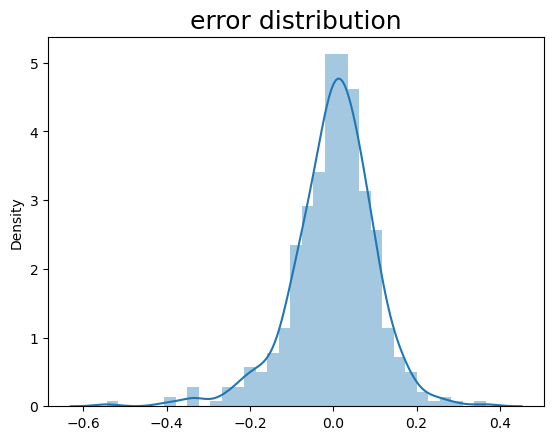

In [58]:
sns.distplot(res)
plt.title('error distribution', fontsize=18)
plt.show()

The errors are normally distributed

In [59]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8012187958872576

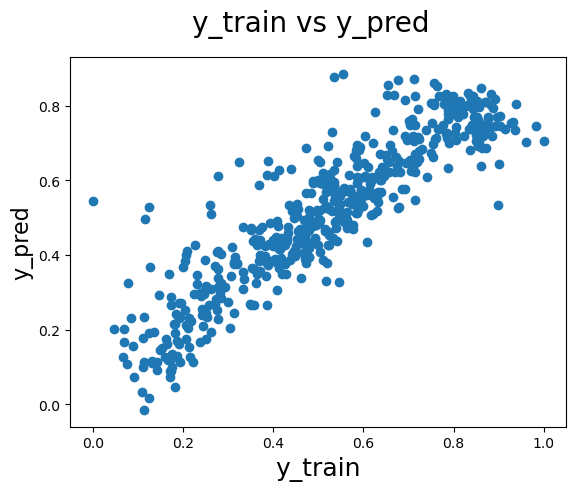

In [60]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

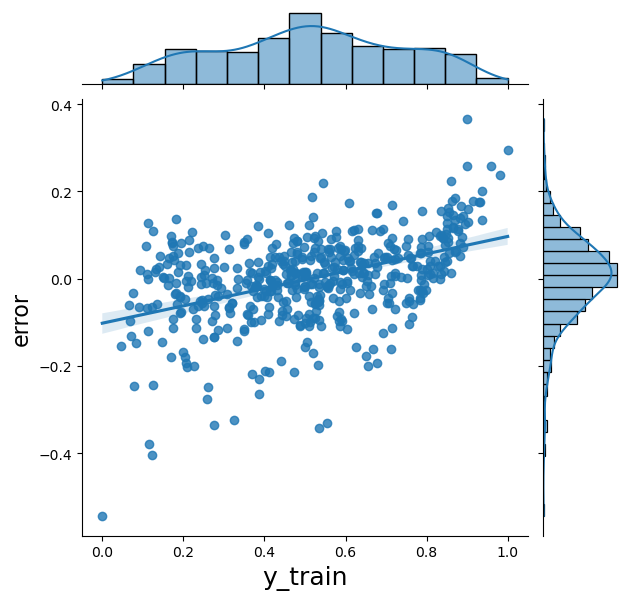

In [61]:
sns.jointplot(x=y_train,y=res,kind=F'reg')
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

Here we can discern that the error terms are not independent and this problem might require a higher order model

Prediction against the test set

In [62]:
num_vars_test = ['mnth','weekday_new','temp','atemp','hum','windspeed','cnt']

df_test[num_vars_test] = scaler.transform(df_test[num_vars_test])

In [63]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.531202,0.255708,0.264840,0.232877,0.319635,0.652968
std,0.500722,0.311080,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.330131,0.437258,0.442259,0.423633,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.727273,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.833333,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df_test.shape

(219, 15)

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

Predicting with "lm" model against the test dataset

In [66]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

In [67]:
y_test_pred = lm.predict(X_test_new_sm)

In [68]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.788492693105792

In [69]:
res_test=y_test-y_test_pred

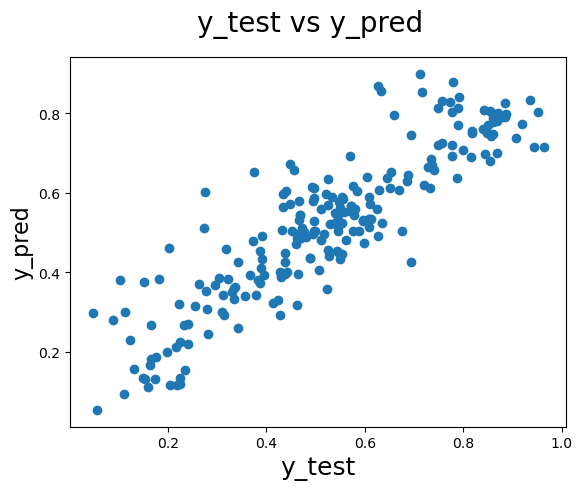

In [70]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

The error distribution is homoscedastic, as seen from above plot

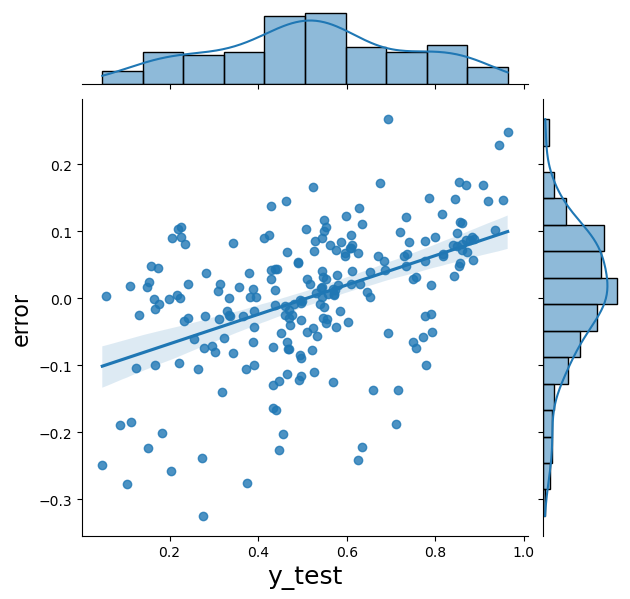

In [71]:
sns.jointplot(x=y_test,y=res_test,kind=F'reg')
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

R2 score from training dataset: 0.80

R2 score from test dataset:0.788

Complete equation:

cnt= 0.1338 + 0.237*(yr) - 0.0826*(holiday) + 0.46*(temp) - 0.17*(windspeed) - 0.077*(Spring) + 0.042*(Summer) + 0.0705*(Winter) + 0.091*(clear_partlycloudy)


Which variables are significant in predicting the demand for shared bikes?How well those variables describe the bike demands?

1) The temperature or weather conditions form a weightage nearly 66% (temp+Summer+Winter+clear_partlycloudy)as the cause of more demand, here it is not clear as to why the weather condition "Spring" has a negative correlation with the target variable

2) The variable "yr" has a weightage of nearly 24% for increase in bike demand

